In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,
         'arakawa':34, 'cg':42}

In [55]:
#read in csv file
df1 = pd.read_csv('benchmark_v100_mpi4.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']/1e6)
for name, mem in memops.items():
    df1[name] = df1['size']/1000*mem/df1[name]
dfr = df1[['n','Nx','Ny','size']+list(memops.keys())]
#dfr

In [56]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','size'])

In [57]:
#dfr['dy'].plot()

In [58]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 2048 2048 
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [59]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [60]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
#efficiency['axpby']

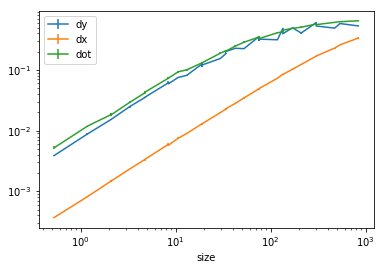

In [61]:
fig=plt.figure()
ax = efficiency['dy'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err')
ax = efficiency['dx'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
ax = efficiency['dot'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
plt.yscale('log')
ax.legend(['dy','dx','dot'])

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


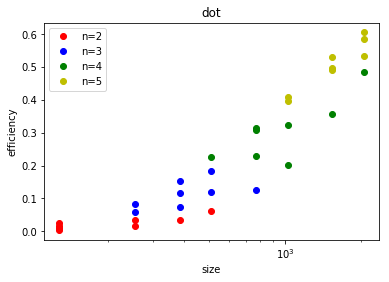

3351.099208213509

In [62]:
fig=plt.figure()
plotlist = [('dy','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
ax = efficiency.iloc[0:8].plot(    x=('Nx',''),y=plotlist,style=stylelist[0])
efficiency.iloc[8:16].plot(ax=ax,  x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency.iloc[16:24].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
efficiency.iloc[24:32].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[3])
#plt.loglog()
plt.title('dot')
plt.xscale('log')
plt.ylabel('efficiency')
plt.xlabel('size')
plt.legend(['n=2','n=3','n=4','n=5'])
plt.show()
base_bandwidth